# Interconnect

Telecommunications operator Interconnect would like to be able to forecast their customer churn rate. If it is discovered that a user plans to leave, they will be offered promotional codes and special plan options. The marketing team at Interconnect has collected some personal data from their customers, including information about their plans and contracts.

### Interconnect Services

Interconnect primarily provides two types of services:

1. Fixed-line telephone communication. The phone can be connected to multiple lines simultaneously.
2. Internet. The network can be set up through a telephone line (DSL, Digital Subscriber Line) or through fiber optic cable.

Some other services offered by the company include:

- Internet security: antivirus software (DeviceProtection) and a malicious website blocker (OnlineSecurity).
- Technical support hotline (TechnicalSupport).
- Cloud file storage and data backup (OnlineBackup).
- TV streaming (StreamingTV) and movie directory (StreamingMovies).

Customers can choose between monthly payment or signing a 1 or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

# Data Description

The data consists of files obtained from different sources:

- `contract.csv` — Contract information.
- `personal.csv` — Customer's personal data.
- `internet.csv` — Information about Internet services.
- `phone.csv` — Information about phone services.

In each file, the column `customerID` contains a unique code assigned to each customer. The contract information is valid starting from February 1, 2020.

# Initialization

In [290]:
# Load libraries

# Data manipulation
import math
import itertools
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Evaluation
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [291]:
# Load the data into DataFrames
df_contract = pd.read_csv('../datasets/final_provider/contract.csv')
df_personal = pd.read_csv('../datasets/final_provider/personal.csv')
df_internet = pd.read_csv('../datasets/final_provider/internet.csv')
df_phone = pd.read_csv('../datasets/final_provider/phone.csv')

In [292]:
# Print the general/summary information about the DataFrames
df_contract.info()

# Print a random sample of 5 rows from the DataFrame
df_contract.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6311,3162-KKZXO,2015-07-01,No,One year,Yes,Electronic check,100.15,5409.75
6059,7325-ENZFI,2016-11-01,No,One year,Yes,Bank transfer (automatic),40.30,1630.4
525,0750-EBAIU,2015-10-01,No,One year,No,Electronic check,91.25,4738.3
3278,4293-ETKAP,2014-09-01,No,Two year,Yes,Bank transfer (automatic),79.40,5071.9
70,2273-QCKXA,2020-01-01,No,Month-to-month,No,Mailed check,49.05,49.05


In [293]:
# Print the general/summary information about the DataFrames
df_personal.info()

# Print a random sample of 5 rows from the DataFrame
df_personal.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
1737,8887-IPQNC,Female,0,Yes,No
4083,0324-BRPCJ,Female,1,Yes,No
5490,2676-OXPPQ,Male,0,No,No
2040,7398-HPYZQ,Male,0,Yes,No
3630,9986-BONCE,Female,0,No,No


In [294]:
# Print the general/summary information about the DataFrames
df_internet.info()

# Print a random sample of 5 rows from the DataFrame
df_internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1197,1769-GRUIK,Fiber optic,No,No,No,No,No,No
3903,5600-PDUJF,DSL,No,No,No,Yes,No,No
2093,8348-HFYIV,DSL,No,No,Yes,No,Yes,Yes
1266,5816-JMLGY,DSL,No,Yes,Yes,Yes,Yes,Yes
3323,5939-XAIXZ,DSL,No,No,Yes,No,No,No


In [295]:
# Print the general/summary information about the DataFrames
df_phone.info()

# Print a random sample of 5 rows from the DataFrame
df_phone.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
5431,1099-GODLO,No
1418,4672-FOTSD,Yes
4083,0575-CUQOV,No
4567,7298-IZWLY,No
3972,0853-NWIFK,No


## Observations
- `customerID` column is used for user identification, which is why it appears in all datasets. It is very useful for merging all the datasets into one.
- There are incorrect data types or data that could be represented in a better way in all datasets.
- Since not all users have internet or telephone services, the datasets for these do not have the same number of records as the datasets with user information.
- `BeginDate` column in the contract dataset may not be directly useful, but it can be used to create a `MonthsInCompany` column by subtracting the value of `BeginDate` from `EndDate`.

# Prepare data

## Contract

In [296]:
# Replace all 'No' values in EndDate column with None
df_contract['EndDate'] = np.where(df_contract['EndDate'] == 'No', None, df_contract['EndDate'])

# Parse the date columns
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], format='%Y-%m-%d')
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'], format='%Y-%m-%d')

# Create column with the number of months the customer has been with the company
df_contract['MonthsInCompany'] = (df_contract['EndDate'] - df_contract['BeginDate']) / pd.Timedelta(days=30)

# Replace all NaN values with the latest date on the EndDate column minus the BeginDate column
df_contract['MonthsInCompany'].fillna((df_contract['EndDate'].max() - df_contract['BeginDate']) / pd.Timedelta(days=30), inplace=True)

# Create column with the boolean value of whether the customer has left the company or not
df_contract['Churn'] = df_contract['EndDate'].notna().astype('uint8')

# Drop Date columns
df_contract.drop(['BeginDate', 'EndDate'], axis=1, inplace=True)

In [297]:
# Explore values on the Type column
print(df_contract['Type'].value_counts())

# Apply OHE to the Type column
df_contract = pd.get_dummies(df_contract, columns=['Type'], drop_first=True)

# Rename the columns to remove the space
df_contract.rename(columns={'Type_One year': 'Type_OneYear', 'Type_Two year': 'Type_TwoYear'}, inplace=True)

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64


In [298]:
# Parse PaperlessBilling column to boolean
df_contract['PaperlessBilling'] = np.where(df_contract['PaperlessBilling'] == 'Yes', 1, 0).astype('uint8')

In [299]:
# Explore values on the PaymentMethod column
print(df_contract['PaymentMethod'].value_counts())

# Apply OHE to the PaymentMethod column
df_contract = pd.get_dummies(df_contract, columns=['PaymentMethod'], drop_first=True)

# Rename the columns to remove the space
df_contract.rename(columns={'PaymentMethod_Credit card (automatic)': 'PaymentMethod_CreditCard',
                            'PaymentMethod_Electronic check': 'PaymentMethod_ElectronicCheck',
                            'PaymentMethod_Mailed check': 'PaymentMethod_MailedCheck'}, inplace=True)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [300]:
# Drop TotalCharges column as it is redundant with the MonthsInCompany column
df_contract.drop('TotalCharges', axis=1, inplace=True)

In [301]:
# Print the general/summary information about the DataFrames
df_contract.info()

# Print a random sample of 5 rows from the DataFrame
df_contract.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     7043 non-null   object 
 1   PaperlessBilling               7043 non-null   uint8  
 2   MonthlyCharges                 7043 non-null   float64
 3   MonthsInCompany                7043 non-null   float64
 4   Churn                          7043 non-null   uint8  
 5   Type_OneYear                   7043 non-null   uint8  
 6   Type_TwoYear                   7043 non-null   uint8  
 7   PaymentMethod_CreditCard       7043 non-null   uint8  
 8   PaymentMethod_ElectronicCheck  7043 non-null   uint8  
 9   PaymentMethod_MailedCheck      7043 non-null   uint8  
dtypes: float64(2), object(1), uint8(7)
memory usage: 213.3+ KB


,customerID,PaperlessBilling,MonthlyCharges,MonthsInCompany,Churn,Type_OneYear,Type_TwoYear,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck
727,6786-OBWQR,1,80.85,4.066667,0,0,0,0,1,0
1901,5777-ZPQNC,0,20.15,11.133333,0,1,0,0,1,0
6996,4174-LPGTI,1,66.50,41.600000,1,1,0,0,0,0
4860,7321-ZNSLA,0,40.55,12.166667,0,0,1,0,0,1
1448,2958-NHPPS,0,20.85,22.366667,0,0,0,0,1,0


In [302]:
# Explore churn values
print(df_contract['Churn'].value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


### Observations

- Columns `BeginDate` and `EndDate` are used to calculate the columns `MonthsInCompany` and `Churn`.
- Column `MonthsInCompany` contains the number of months between the start and end dates of the contract. If there is no end date, the last date in `EndDate` column is used to calculate the months in company at the time of dataset creation.
- Missing values in `EndDate` column also help us determine churn, as they indicate whether or not a customer still maintains their contract.
- One Hot Encoding was performed on the `Type` and `PaymentMethod` columns to keep only numerical values in the dataset.
- Column `TotalCharges` was removed as it is redundant with both `MonthlyCharges` and `MonthsInCompany` columns.
- Column `Churn` is now our target variable for creating a predictive model. The contracts dataset has no missing values and contains all required information and data types.

## Personal

In [303]:
# Explore values on the gender column
print(df_personal['gender'].value_counts())

# Apply OHE to the gender column
df_personal = pd.get_dummies(df_personal, columns=['gender'], drop_first=True)

# Rename the column 
df_personal.rename(columns={'gender_Male': 'IsMale'}, inplace=True)

Male      3555
Female    3488
Name: gender, dtype: int64


In [304]:
# Explore values on the SeniorCitizen column
print(df_personal['SeniorCitizen'].value_counts())

# Explore values on the Partner column
print(df_personal['Partner'].value_counts())

# Explore values on the Dependents column
print(df_personal['Dependents'].value_counts())

# Parse columns to boolean
df_personal['SeniorCitizen'] = df_personal['SeniorCitizen'].astype('uint8')
df_personal['Partner'] = np.where(df_personal['Partner'] == 'Yes', 1, 0).astype('uint8')
df_personal['Dependents'] = np.where(df_personal['Dependents'] == 'Yes', 1, 0).astype('uint8')

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64


In [305]:
# Print the general/summary information about the DataFrames
df_personal.info()

# Print a random sample of 5 rows from the DataFrame
df_personal.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   SeniorCitizen  7043 non-null   uint8 
 2   Partner        7043 non-null   uint8 
 3   Dependents     7043 non-null   uint8 
 4   IsMale         7043 non-null   uint8 
dtypes: object(1), uint8(4)
memory usage: 82.7+ KB


,customerID,SeniorCitizen,Partner,Dependents,IsMale
6694,4526-RMTLL,0,1,1,1
691,6663-JOCQO,0,1,1,1
5322,8731-WBBMB,0,1,0,0
6022,5025-GOOKI,0,0,0,0
4200,8316-BBQAY,0,0,0,0


### Observations

- There are no missing values in the dataset.
- One Hot Encoding was applied to `gender` column to have the desired data type.

## Internet

In [306]:
# Explore values on the InternetService column
print(df_internet['InternetService'].value_counts())

# Apply OHE to the gender column without dropping the DSL column so that we can use it as a reference when no internet service is used
df_internet = pd.get_dummies(df_internet, columns=['InternetService'])

# Rename the column to remove the space
df_internet.rename(columns={'InternetService_Fiber optic': 'InternetService_FiberOptic'}, inplace=True)

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64


In [307]:
# Explore values on the OnlineSecurity column
print(df_internet['OnlineSecurity'].value_counts())

# Explore values on the OnlineBackup column
print(df_internet['OnlineBackup'].value_counts())

# Explore values on the DeviceProtection column
print(df_internet['DeviceProtection'].value_counts())

# Explore values on the TechSupport column
print(df_internet['TechSupport'].value_counts())

# Explore values on the StreamingTV column
print(df_internet['StreamingTV'].value_counts())

# Explore values on the StreamingMovies column
print(df_internet['StreamingMovies'].value_counts())

# Parse columns to boolean
mapping_dict = {'Yes': 1, 'No': 0}
columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in columns:
    df_internet[col] = df_internet[col].map(mapping_dict).astype('uint8')

No     3498
Yes    2019
Name: OnlineSecurity, dtype: int64
No     3088
Yes    2429
Name: OnlineBackup, dtype: int64
No     3095
Yes    2422
Name: DeviceProtection, dtype: int64
No     3473
Yes    2044
Name: TechSupport, dtype: int64
No     2810
Yes    2707
Name: StreamingTV, dtype: int64
No     2785
Yes    2732
Name: StreamingMovies, dtype: int64


In [308]:
# Print the general/summary information about the DataFrames
df_internet.info()

# Print a random sample of 5 rows from the DataFrame
df_internet.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   customerID                  5517 non-null   object
 1   OnlineSecurity              5517 non-null   uint8 
 2   OnlineBackup                5517 non-null   uint8 
 3   DeviceProtection            5517 non-null   uint8 
 4   TechSupport                 5517 non-null   uint8 
 5   StreamingTV                 5517 non-null   uint8 
 6   StreamingMovies             5517 non-null   uint8 
 7   InternetService_DSL         5517 non-null   uint8 
 8   InternetService_FiberOptic  5517 non-null   uint8 
dtypes: object(1), uint8(8)
memory usage: 86.3+ KB


,customerID,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_DSL,InternetService_FiberOptic
3277,7572-KPVKK,0,0,1,1,1,1,0,1
3298,2990-IAJSV,1,1,1,1,1,1,1,0
5429,2405-LBMUW,1,1,0,1,0,1,1,0
3144,2969-WGHQO,1,1,1,0,1,0,1,0
4256,7432-FFVAR,0,0,1,1,0,1,0,1


### Observations

- There are no missing values in the dataset.
- One Hot Encoding was applied to `InternetService` column, without removing any columns, in order to differentiate between having an internet service or not and the type of service.

## Phone

In [309]:
# Explore values on the MultipleLines column
print(df_phone['MultipleLines'].value_counts())

# Parse columns to boolean
df_phone['MultipleLines'] = np.where(df_phone['MultipleLines'] == 'Yes', 1, 0).astype('uint8')

No     3390
Yes    2971
Name: MultipleLines, dtype: int64


In [310]:
# Print the general/summary information about the DataFrames
df_phone.info()

# Print a random sample of 5 rows from the DataFrame
df_phone.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   uint8 
dtypes: object(1), uint8(1)
memory usage: 56.0+ KB


,customerID,MultipleLines
3118,2430-USGXP,1
4256,9965-YOKZB,1
5419,2324-EFHVG,1
1353,8695-WDYEA,0
383,9063-ZGTUY,0


### Observations

- There are no missing values in the dataset.

In [311]:
# Merge all DataFrames into a single DataFrame on the customerID column
df = pd.merge(df_contract, df_personal, on='customerID', how='outer')
df = pd.merge(df, df_internet, on='customerID', how='outer')
df = pd.merge(df, df_phone, on='customerID', how='outer')

# Drop customerID column as it is no longer needed
df = df.drop('customerID', axis=1).reset_index(drop=True)

In [312]:
# Use NaN values to identify customers without internet or phone service

# Create HasInternetService column based on whether the customer has internet service or not
df['HasInternetService'] = df['OnlineSecurity'].notna().astype('uint8')

# Create HasPhoneService column based on whether the customer has phone service or not
df['HasPhoneService'] = df['MultipleLines'].notna().astype('uint8')

In [313]:
# Fill in the missing values with 0 for the following columns as they are boolean
columns_to_fill = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'InternetService_FiberOptic', 'InternetService_DSL', 'MultipleLines']
for col in columns_to_fill:
    df[col] = df[col].fillna(0).astype('uint8')

# Print the general/summary information about the DataFrames
df.info()

# Print a random sample of 5 rows from the DataFrame
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PaperlessBilling               7043 non-null   uint8  
 1   MonthlyCharges                 7043 non-null   float64
 2   MonthsInCompany                7043 non-null   float64
 3   Churn                          7043 non-null   uint8  
 4   Type_OneYear                   7043 non-null   uint8  
 5   Type_TwoYear                   7043 non-null   uint8  
 6   PaymentMethod_CreditCard       7043 non-null   uint8  
 7   PaymentMethod_ElectronicCheck  7043 non-null   uint8  
 8   PaymentMethod_MailedCheck      7043 non-null   uint8  
 9   SeniorCitizen                  7043 non-null   uint8  
 10  Partner                        7043 non-null   uint8  
 11  Dependents                     7043 non-null   uint8  
 12  IsMale                         7043 non-null   u

,PaperlessBilling,MonthlyCharges,MonthsInCompany,Churn,Type_OneYear,Type_TwoYear,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,PaymentMethod_MailedCheck,SeniorCitizen,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_DSL,InternetService_FiberOptic,MultipleLines,HasInternetService,HasPhoneService
2241,1,24.95,55.833333,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5892,1,51.65,9.166667,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3353,1,85.05,11.133333,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,1,1
2584,1,65.25,57.866667,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,1
5874,1,100.60,10.133333,1,0,0,0,1,0,0,...,0,1,0,1,1,0,1,1,1,1


# EDA

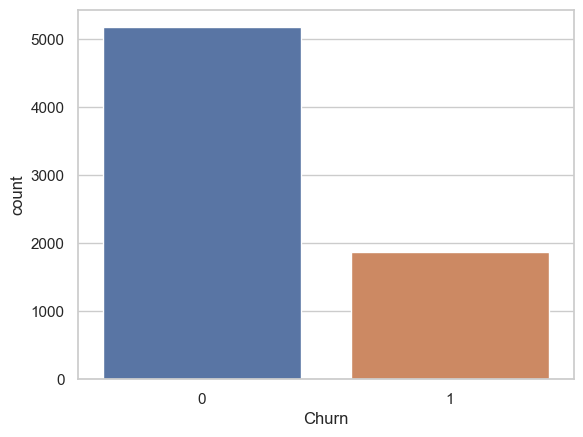

In [314]:
# Create a graph to visualize the distribution of the target variable
sns.countplot(x='Churn', data=df)
plt.show()

## Observations

- There is an imbalance of classes for the target variable. Approximately 73% of customers did not churn, while 27% did.

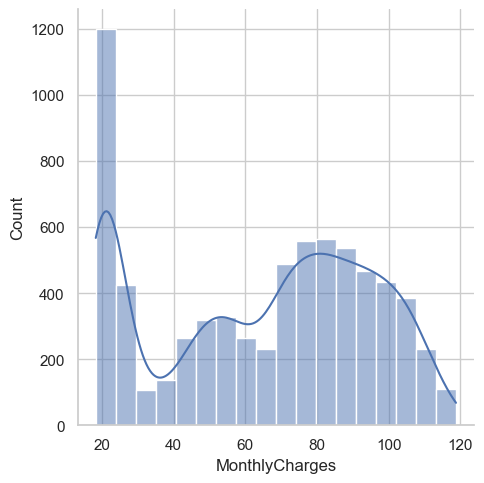

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


In [315]:
# Create a graph to visualize the distribution and descriptive statistics of MonthlyCharges
sns.displot(df['MonthlyCharges'], kde=True)
plt.show()

print(df['MonthlyCharges'].describe())

## Observations

- These statistics indicate a wide distribution in monthly charges, with some customers paying very low fees and others paying considerably high charges.

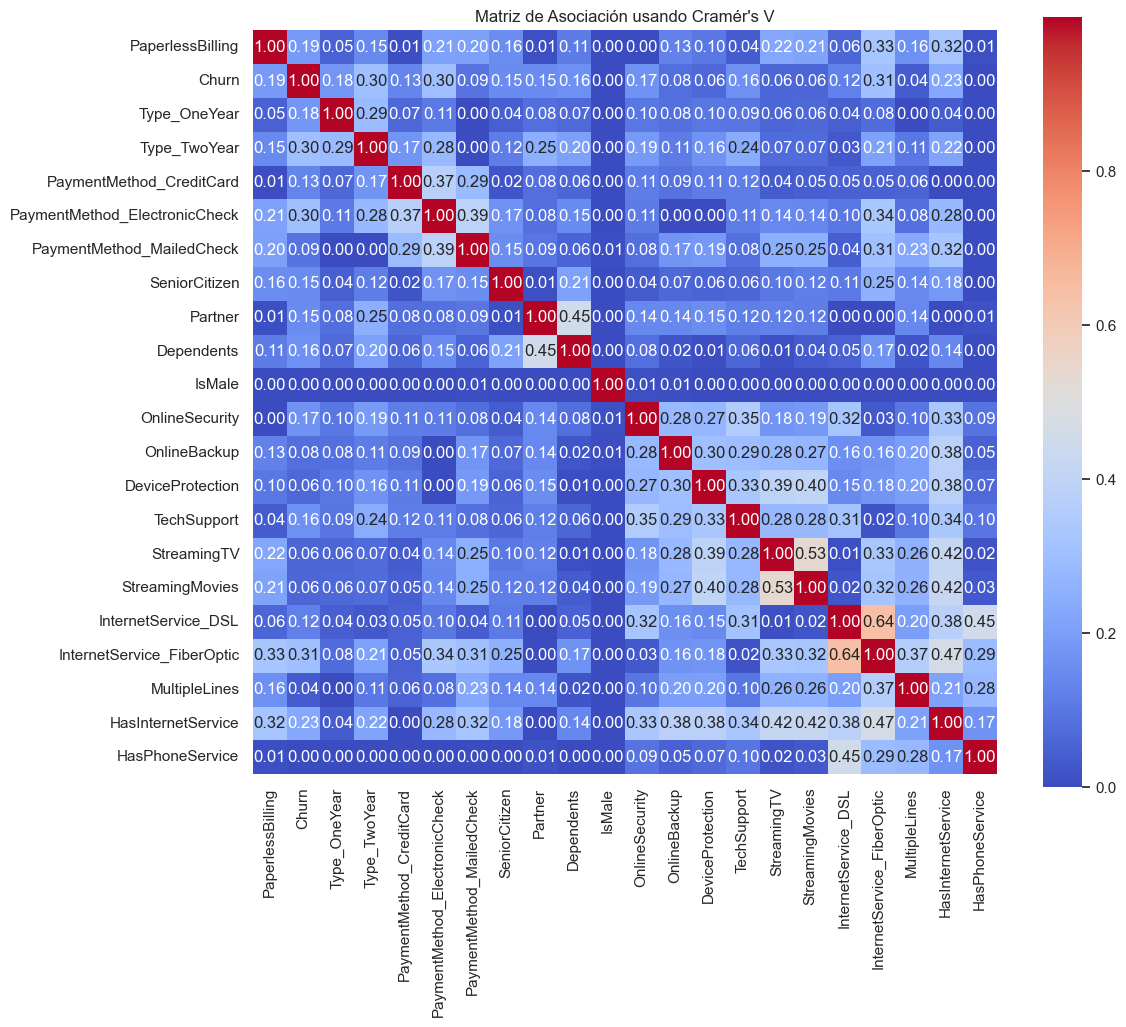

In [316]:
# Create a function to calculate Cramer's V for categorical-categorical association
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create an association matrix for all categorical variables
categorical_columns = df.select_dtypes(include=['uint8']).columns

n = len(categorical_columns)
association_matrix = np.zeros((n, n))

for i, j in itertools.product(range(n), range(n)):
    association_matrix[i, j] = cramers_v(df[categorical_columns[i]], df[categorical_columns[j]])

association_df = pd.DataFrame(association_matrix, index=categorical_columns, columns=categorical_columns)

# Create a heatmap to visualize the association matrix
plt.figure(figsize=(12, 10))
sns.heatmap(association_df, annot=True, cmap="coolwarm", cbar=True, square=True, fmt=".2f")
plt.title("Matriz de Asociación usando Cramér's V")
plt.show()

In [317]:
# Print the association values for the Churn column
association_df['Churn'].sort_values(ascending=False)

Churn                            0.999636
InternetService_FiberOptic       0.307487
Type_TwoYear                     0.301663
PaymentMethod_ElectronicCheck    0.301364
HasInternetService               0.227204
PaperlessBilling                 0.191141
Type_OneYear                     0.177037
OnlineSecurity                   0.170467
TechSupport                      0.163898
Dependents                       0.163448
SeniorCitizen                    0.149991
Partner                          0.149663
PaymentMethod_CreditCard         0.133389
InternetService_DSL              0.123310
PaymentMethod_MailedCheck        0.090526
OnlineBackup                     0.081051
DeviceProtection                 0.064738
StreamingTV                      0.061762
StreamingMovies                  0.059882
MultipleLines                    0.037952
IsMale                           0.000000
HasPhoneService                  0.000000
Name: Churn, dtype: float64

## Observations

- Although `Churn` in relation to `Type_TwoYear` or `PaymentMethod_ElectronicCheck` or `InternetService_FiberOptic` does not have an extremely high value, if this relationship is significant in the context of the business, it can be crucial for understanding and predicting customer churn. Additionally, these columns are the ones that obtained the highest association value.

- `InternetService_DSL` and `InternetService_FiberOptic` have a high value, which makes sense since they are mutually exclusive categories. If a customer has DSL, it is less likely that they have fiber optic and vice versa.

- For the target variable `Churn`:
    1. **Monthly charges and fiber optic**. Customers with fiber optic service (`InternetService_FiberOptic`) have a higher probability of churning due to the high cost of this service.
    2. **Payment method**. Customers using electronic check (`PaymentMethod_ElectronicCheck`) have a higher probability of churning compared to other payment methods.
    3. **Tenure with company**. Customers who have been with the company for longer (`Type_TwoYear`) have a lower probability of churning, which is intuitive as loyalty and familiarity with the service may increase over time.

- The columns with correlations closest to zero for the target variable `Churn` will be removed to speed up model training stage:
    - `PaymentMethod_MailedCheck`
    - `OnlineBackup`
    - `DeviceProtection`
    - `StreamingTV`
    - `StreamingMovies`
    - `MultipleLines`
    - `IsMale`
    - `HasPhoneService`
- The column `HasInternetService` will also be removed due to its high multicollinearity with other columns related to internet services.

In [318]:
# Drop the following columns as they are not relevant to the prediction of Churn or they are highly correlated with other columns
cols = [
    "PaymentMethod_MailedCheck",
    "OnlineBackup",
    "DeviceProtection",
    "StreamingTV",
    "StreamingMovies",
    "MultipleLines",
    "IsMale",
    "HasPhoneService",
    "HasInternetService",
]
df.drop(cols, axis=1, inplace=True)

# Print the general/summary information about the DataFrames
df.info()

# Print a random sample of 5 rows from the DataFrame
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PaperlessBilling               7043 non-null   uint8  
 1   MonthlyCharges                 7043 non-null   float64
 2   MonthsInCompany                7043 non-null   float64
 3   Churn                          7043 non-null   uint8  
 4   Type_OneYear                   7043 non-null   uint8  
 5   Type_TwoYear                   7043 non-null   uint8  
 6   PaymentMethod_CreditCard       7043 non-null   uint8  
 7   PaymentMethod_ElectronicCheck  7043 non-null   uint8  
 8   SeniorCitizen                  7043 non-null   uint8  
 9   Partner                        7043 non-null   uint8  
 10  Dependents                     7043 non-null   uint8  
 11  OnlineSecurity                 7043 non-null   uint8  
 12  TechSupport                    7043 non-null   u

,PaperlessBilling,MonthlyCharges,MonthsInCompany,Churn,Type_OneYear,Type_TwoYear,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,SeniorCitizen,Partner,Dependents,OnlineSecurity,TechSupport,InternetService_DSL,InternetService_FiberOptic
1791,1,61.50,43.633333,0,1,0,0,0,0,1,0,1,0,1,0
6955,1,45.05,11.133333,0,0,0,0,1,0,0,0,0,0,1,0
2637,0,40.65,35.466667,0,0,1,1,0,0,1,1,1,1,1,0
3491,1,70.95,43.633333,0,1,0,0,1,0,1,0,0,1,1,0
4409,0,46.35,71.066667,0,0,1,1,0,1,1,0,1,1,1,0


## Scaling

In [319]:
# Select numeric columns
num_features = ['MonthlyCharges', 'MonthsInCompany']

# Standardize numeric columns
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Print a random sample of 5 rows from the DataFrame
df.sample(5)

,PaperlessBilling,MonthlyCharges,MonthsInCompany,Churn,Type_OneYear,Type_TwoYear,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,SeniorCitizen,Partner,Dependents,OnlineSecurity,TechSupport,InternetService_DSL,InternetService_FiberOptic
1893,1,0.144188,-0.681489,0,0,0,0,1,0,0,1,1,0,1,0
5136,1,0.260514,-1.254981,0,0,0,0,0,1,0,0,0,0,0,1
3785,1,0.832172,-0.884769,1,0,0,0,1,1,1,0,0,0,0,1
1636,0,-1.343121,0.628387,0,1,0,0,0,0,0,0,0,0,0,0
1575,0,1.154560,1.409198,1,0,0,0,1,0,0,0,0,0,0,1


## Oversampling

In [320]:
# Set random seed for reproducibility
random_state = 12345

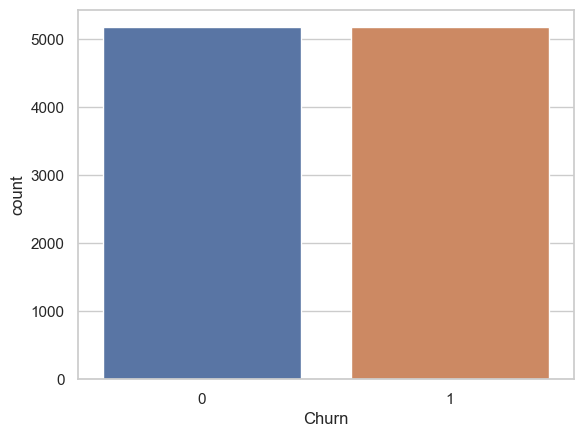

In [321]:
# Adjust the class imbalance by oversampling the minority class
df_majority = df[df['Churn'] == 0]
df_minority = df[df['Churn'] == 1]
df_minority_upsampled = df_minority.sample(df_majority.shape[0], replace=True,  random_state=random_state)
df = pd.concat([df_majority, df_minority_upsampled]).sample(frac=1, random_state=random_state).reset_index(drop=True)

# Create a graph to visualize the distribution of the target variable
sns.countplot(x='Churn', data=df)
plt.show()

In [322]:
# Print the general/summary information about the DataFrames
df.info()

# Print a random sample of 5 rows from the DataFrame
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PaperlessBilling               10348 non-null  uint8  
 1   MonthlyCharges                 10348 non-null  float64
 2   MonthsInCompany                10348 non-null  float64
 3   Churn                          10348 non-null  uint8  
 4   Type_OneYear                   10348 non-null  uint8  
 5   Type_TwoYear                   10348 non-null  uint8  
 6   PaymentMethod_CreditCard       10348 non-null  uint8  
 7   PaymentMethod_ElectronicCheck  10348 non-null  uint8  
 8   SeniorCitizen                  10348 non-null  uint8  
 9   Partner                        10348 non-null  uint8  
 10  Dependents                     10348 non-null  uint8  
 11  OnlineSecurity                 10348 non-null  uint8  
 12  TechSupport                    10348 non-null 

,PaperlessBilling,MonthlyCharges,MonthsInCompany,Churn,Type_OneYear,Type_TwoYear,PaymentMethod_CreditCard,PaymentMethod_ElectronicCheck,SeniorCitizen,Partner,Dependents,OnlineSecurity,TechSupport,InternetService_DSL,InternetService_FiberOptic
1300,0,-0.352690,-0.805342,0,1,0,0,0,0,1,1,1,1,1,0
10094,1,-0.701667,-0.805342,1,0,0,0,1,1,0,0,0,1,1,0
5996,0,-0.184848,-1.254981,1,0,0,0,1,0,0,1,0,0,1,0
6643,1,-1.318194,-1.254981,1,0,0,0,1,1,0,0,0,0,1,0
10253,1,0.649374,1.285345,0,1,0,1,0,0,0,0,1,0,0,1


# Model construction

## Data Segmentation

In [323]:
# Separate the data into features and target
features = df.drop("Churn", axis=1)
target = df["Churn"]

In [324]:
# Divide the data into training, validation, and test subsets (3:1:1)
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=.4, random_state=random_state)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=.5, random_state=random_state)

## Find the best hyperparameters

In [325]:
# Set the scoring metric to be used for choosing the best hyperparameters
scoring = 'roc_auc'

In [326]:
# Create a function to calculate the best hyperparameters for a list of models
def find_best_params(models, train_features, train_targets, scoring):
    # Create a DataFrame to store the results
    results = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best Score'])

    # Iterate through the list of models
    for model in models:
        # Print the name of the model
        print(f"Finding best parameters for {type(model['model']).__name__}...")

        # Perform a grid search of the hyperparameters
        grid = GridSearchCV(model['model'], model['param_grid'], cv=5, scoring=scoring, verbose=0, n_jobs=-1)
        grid.fit(train_features, train_targets)

        # Extract best parameters and score
        best_params = grid.best_params_
        best_score = np.abs(grid.best_score_)

        # Store the results in the DataFrame
        results = pd.concat([results, pd.DataFrame({'Model': type(model['model']).__name__, 
                                  'Best Parameters': [best_params], 
                                  'Best Score': best_score})], ignore_index=True)

        # Sort the DataFrame by best score
        results.sort_values(by='Best Score', ascending=False, inplace=True)

    # Create a bar plot to visualize the best scores
    plt.figure(figsize=(12, 10))
    sns.barplot(data=results, x='Model', y='Best Score', palette="coolwarm")
    plt.title("Grid Search Results")
    plt.xticks(rotation=45)
    plt.tight_layout()

    return results

Finding best parameters for LogisticRegression...
Finding best parameters for RandomForestClassifier...
Finding best parameters for DecisionTreeClassifier...
Finding best parameters for GradientBoostingClassifier...
Finding best parameters for KNeighborsClassifier...


,Model,Best Parameters,Best Score
0,GradientBoostingClassifier,"{'max_depth': 12, 'n_estimators': 200}",0.953495
1,RandomForestClassifier,"{'max_depth': 14, 'n_estimators': 200}",0.933364
2,DecisionTreeClassifier,{'max_depth': 10},0.854115
4,KNeighborsClassifier,{'n_neighbors': 2},0.841740
3,LogisticRegression,{},0.830778


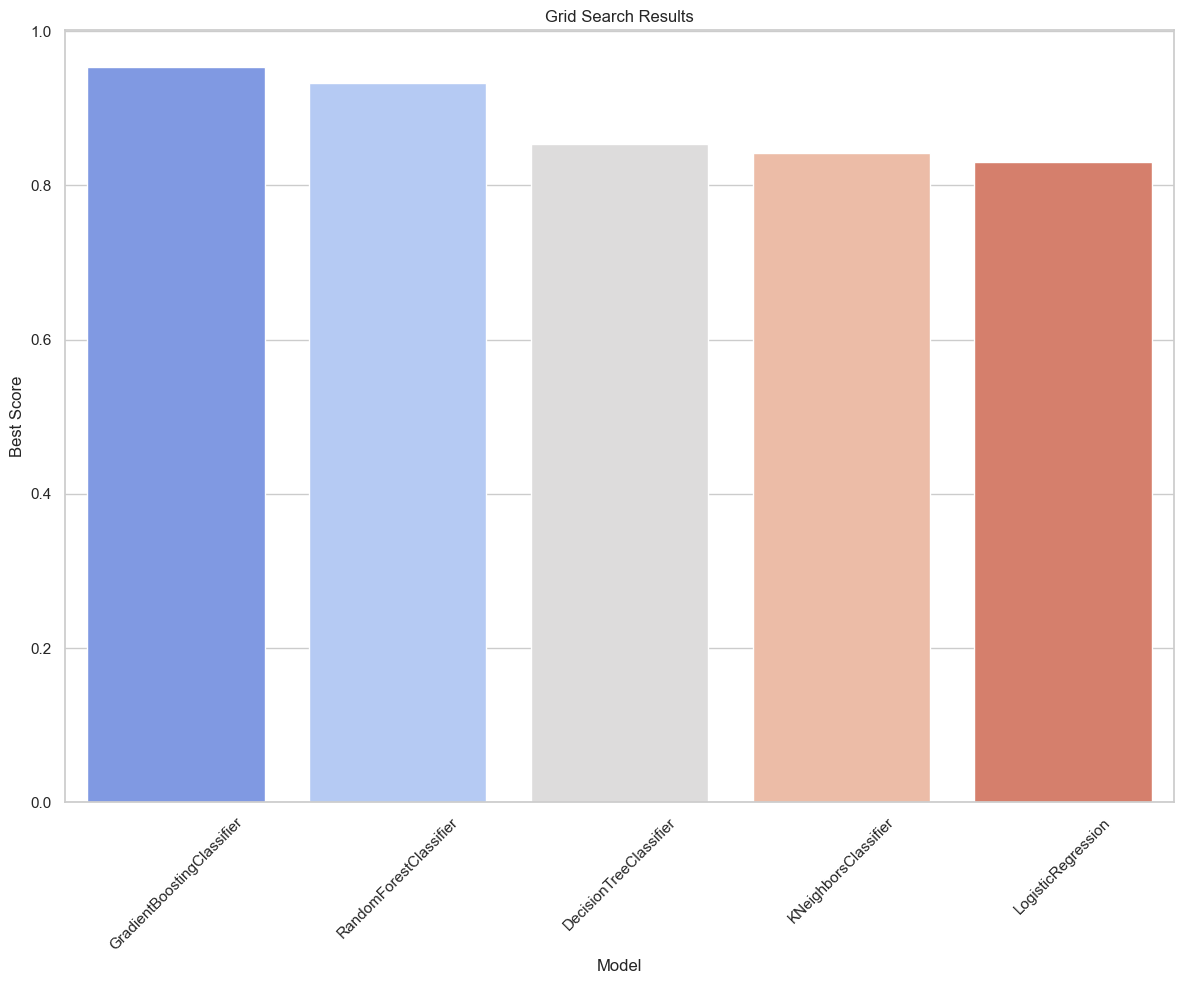

In [327]:
# Define the models and their basic hyperparameters
models = [
    {
        'model': LogisticRegression(random_state=random_state),
        'param_grid': {}
    },
    {
        'model': RandomForestClassifier(random_state=random_state),
        'param_grid': {'n_estimators': np.arange(50, 201, 50), 'max_depth': np.arange(3, 15)}
    },
    {
        'model': DecisionTreeClassifier(random_state=random_state),
        'param_grid': {'max_depth': np.arange(3, 15)}
    },
    {
        'model': GradientBoostingClassifier(random_state=random_state),
        'param_grid': {'n_estimators': np.arange(50, 201, 50), 'max_depth': np.arange(3, 15)}
    },
    {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': np.arange(1, 11)}
    },
]

# Find the best hyperparameters for each model
results = find_best_params(models, features_train, target_train, scoring)

# Print the results
results

In [328]:
# Set the index of the DataFrame to the model name
results.set_index('Model', inplace=True)

# Set the hyperparameters for each model based on the results of the grid search
models = [
    LogisticRegression(random_state=random_state, **results.loc['LogisticRegression']['Best Parameters']),
    RandomForestClassifier(random_state=random_state, **results.loc['RandomForestClassifier']['Best Parameters']),
    DecisionTreeClassifier(random_state=random_state, **results.loc['DecisionTreeClassifier']['Best Parameters']),
    GradientBoostingClassifier(random_state=random_state, **results.loc['GradientBoostingClassifier']['Best Parameters']),
    KNeighborsClassifier(**results.loc['KNeighborsClassifier']['Best Parameters']),
]

## Train and evaluate models

In [329]:
# Create a function to train and evaluate multiple models on the training and validation subsets and create a graph to visualize the results
def train_and_evaluate_models(models, features_train, target_train, features_valid, target_valid):
    # Create a DataFrame to store the results
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])
    
    # Loop through each model
    for model in models:
        # Train the model
        model.fit(features_train, target_train)
        
        # Make predictions
        predictions = model.predict(features_valid)
        
        # Evaluate the model
        accuracy = model.score(features_valid, target_valid)
        f1 = f1_score(target_valid, predictions)
        precision = precision_score(target_valid, predictions)
        recall = recall_score(target_valid, predictions)
        roc_auc = roc_auc_score(target_valid, predictions)
        
        # Append the results to the DataFrame
        results = pd.concat([results, pd.DataFrame({'Model': model.__class__.__name__, 'Accuracy': accuracy, 'F1': f1, 'Precision': precision, 'Recall': recall, 'ROC_AUC': roc_auc}, index=[0])], ignore_index=True)
    
    # Draw a heatmap to visualize the results
    plt.figure(figsize=(14,7))
    sns.set(style="whitegrid")
    sns.heatmap(results.set_index('Model'), annot=True, cmap='RdBu_r')
    plt.title('Model Comparison')
    plt.ylabel('Model')
    plt.tight_layout()
    plt.show()

    return results

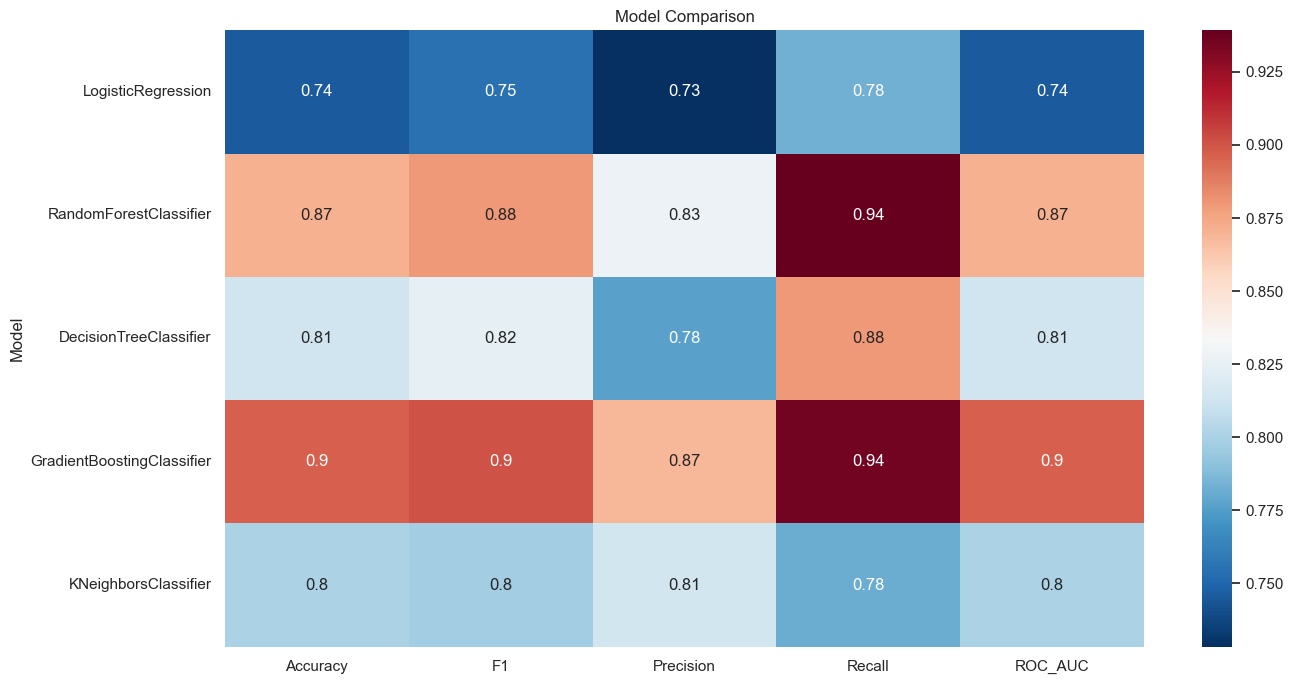

,Model,Accuracy,F1,Precision,Recall,ROC_AUC
0,LogisticRegression,0.744928,0.754647,0.728251,0.783028,0.744854
1,RandomForestClassifier,0.871498,0.879855,0.827528,0.939248,0.871366
2,DecisionTreeClassifier,0.812560,0.824593,0.776170,0.879460,0.812431
3,GradientBoostingClassifier,0.896618,0.900650,0.868397,0.935391,0.896543
4,KNeighborsClassifier,0.800483,0.796852,0.813253,0.781099,0.800521


In [330]:
# Train and evaluate the models
train_results = train_and_evaluate_models(models, features_train, target_train, features_valid, target_valid)

# Print the results
train_results

## Intermediate Conclusion
- **Accuracy**: `GradientBoostingClassifier` has the highest accuracy, with an approximate value of 89.66%.
- **F1**: `GradientBoostingClassifier` also has the highest F1 score, with a value of 90.06%.
- **Precision**: `GradientBoostingClassifier` has the highest precision, with an approximate value of 86.83%.
- **Recall**: `RandomForestClassifier` has the highest recall, with an approximate value of 93.92%.
- **ROC_AUC**: `GradientBoostingClassifier` has the best ROC_AUC evaluation, with an approximate value of 89.65%.

Overall, `GradientBoostingClassifier` would be the model with the best scores.

# Model quality assurance

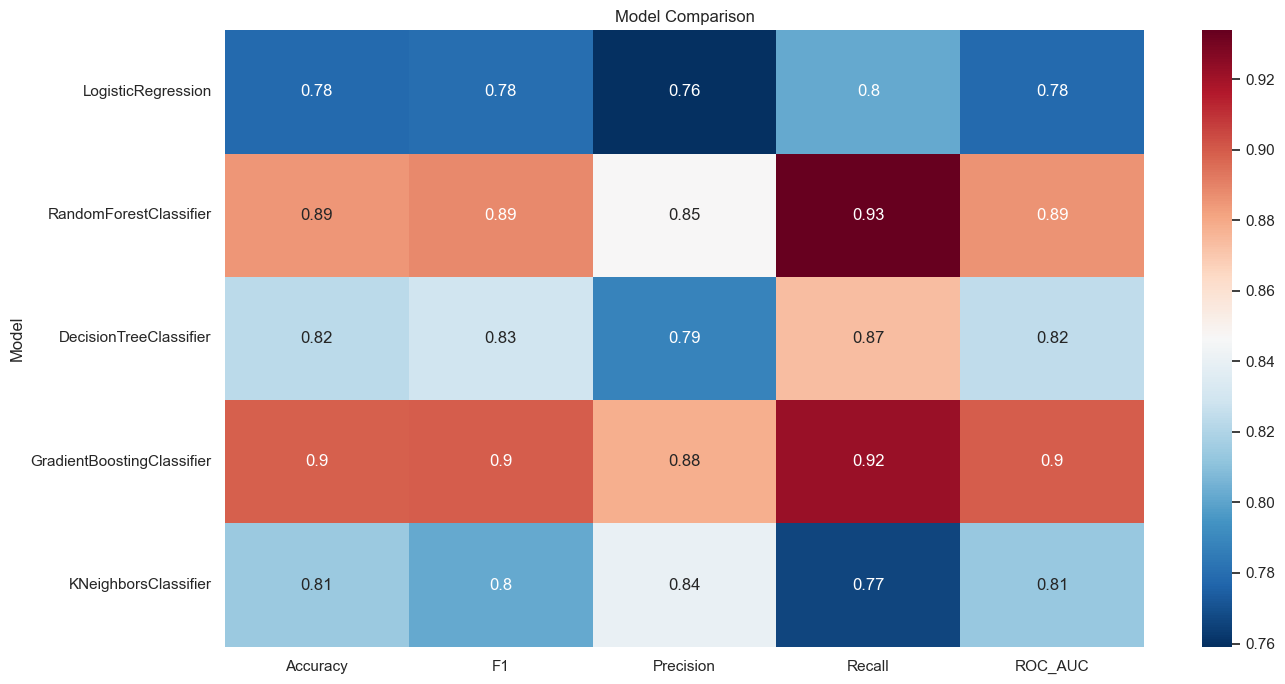

,Model,Accuracy,F1,Precision,Recall,ROC_AUC
0,LogisticRegression,0.778261,0.779856,0.759104,0.801775,0.778728
1,RandomForestClassifier,0.885024,0.888368,0.847048,0.933925,0.885997
2,DecisionTreeClassifier,0.823188,0.828812,0.788256,0.873767,0.824194
3,GradientBoostingClassifier,0.899034,0.899471,0.877934,0.922091,0.899492
4,KNeighborsClassifier,0.814010,0.801444,0.840000,0.766272,0.813060


In [331]:
# Train and evaluate the models on the test set
test_results = train_and_evaluate_models(models, features_train, target_train, features_test, target_test)

# Print the results
test_results

## Intermediate Conclusion

`GradientBoostingClassifier` has shown good performance not only on the validation set but also on the test set. These results are consistent and demonstrate that the model is robust and reliable.

# General Conclusion

The tested classification models included `LogisticRegression`, `RandomForestClassifier`, `DecisionTreeClassifier`, `GradientBoostingClassifier`, and `KNeighborsClassifier`. The analysis revealed that:

- The `DecisionTreeClassifier` model performed well but was not the best compared to other models.
- The `RandomForestClassifier` model had high performance in terms of accuracy but with a longer execution time.
- The `LogisticRegression` model provided moderate results, being outperformed in performance by more complex models.
- The `GradientBoostingClassifier` model stood out by providing the best performance in almost all scores, proving to be the most robust model among those tested.
- The `KNeighborsClassifier` model also performed well but was surpassed by random forest and gradient boosting.

The `GradientBoostingClassifier` model stood out for its balance between high precision and an `ROC_AUC` score close to `0.9`. This model demonstrated its ability to effectively learn from data and make accurate predictions.

Furthermore, preprocessing and feature engineering played a crucial role in improving the models' performance. Removing multicollinear columns and creating new columns such as `MonthsInCompany` helped simplify the dataset while retaining essential information.

In conclusion, for predicting customer churn in this specific context, gradient boosting is the most suitable tool. However, it is essential to continue monitoring and validating the model with new data to ensure its robustness and relevance over time.